## Import Libraries

In [5]:
import numpy as np  # linear algebra
import pandas as pd # data processing CSV file
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from scipy.ndimage import zoom
from scipy import ndimage
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from PIL import Image

## Dataset Visualization

In [7]:
# Load training data from dataset
train_data_path = "../setData/processed_data_set/train/data.npy"
test_data_path = "../setData/processed_data_set/test/data.npy"

# Load data
train_data = np.load(train_data_path, allow_pickle=True)
test_data = np.load(test_data_path, allow_pickle=True)

# Convert datasets to dataframes
train_df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in train_data])
test_df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in test_data])

# Check dataset shapes & preview first 5 rows of each data
print("Training Data Shape:", train_df.shape)
print(train_df.head())
print("\nTest Data Shape:", test_df.shape)
print(test_df.head())


Training Data Shape: (41473, 2)
   emotion                                             pixels
0    angry  [120, 81, 8, 0, 3, 14, 39, 57, 46, 28, 53, 69,...
1  neutral  [0, 0, 130, 126, 125, 120, 146, 157, 150, 161,...
2  neutral  [230, 229, 232, 199, 63, 14, 25, 28, 24, 16, 2...
3  neutral  [134, 136, 133, 159, 178, 167, 167, 155, 155, ...
4  neutral  [116, 160, 152, 160, 147, 58, 25, 40, 43, 46, ...

Test Data Shape: (7178, 2)
  emotion                                             pixels
0   angry  [83, 75, 62, 51, 56, 61, 33, 19, 13, 15, 13, 4...
1   angry  [127, 126, 123, 119, 115, 112, 111, 111, 110, ...
2   angry  [250, 251, 251, 249, 250, 250, 248, 251, 250, ...
3   angry  [94, 183, 202, 212, 214, 219, 222, 217, 200, 2...
4   angry  [73, 78, 86, 101, 113, 117, 123, 129, 127, 118...


In [8]:
def print_emotion_counts(df, dataset_name):
    emotion_counts = df['emotion'].value_counts().reset_index()
    emotion_counts.columns = ['emotion', 'number']
    print(f"{dataset_name} Dataset Emotion Counts:")
    print(emotion_counts)

# Calculate and print emotion counts for both datasets
print_emotion_counts(train_df, "Training")
print()
print_emotion_counts(test_df, "Testing")


Training Dataset Emotion Counts:
    emotion  number
0     happy   10445
1   neutral    7191
2       sad    6966
3      fear    5929
4     angry    5739
5  surprise    4565
6   disgust     638

Testing Dataset Emotion Counts:
    emotion  number
0     happy    1774
1       sad    1247
2   neutral    1233
3      fear    1024
4     angry     958
5  surprise     831
6   disgust     111


## Naive Bayes Model

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [10]:
# Label to number mapping
def label_generate(label):
    labels_dict = {"angry": 0, "disgust": 1, "fear": 2, "happy": 3, 
                   "neutral": 4, "sad": 5, "surprise": 6}
    return labels_dict.get(label, None)

In [11]:
# Load data (paths may need to be adjusted based on your directory structure)
train_data_path = "../setData/processed_data_set/train/data.npy"
train_data = np.load(train_data_path, allow_pickle=True)
test_data_path = "../setData/processed_data_set/test/data.npy"
test_data = np.load(test_data_path, allow_pickle=True)


Accuracy: 0.21374321880650995

              precision    recall  f1-score   support

       Angry       0.20      0.06      0.09      1168
     Disgust       0.02      0.12      0.03       128
        Fear       0.24      0.07      0.11      1183
       Happy       0.41      0.18      0.25      2089
     Neutral       0.23      0.13      0.16      1462
         Sad       0.22      0.38      0.28      1350
    Surprise       0.20      0.60      0.29       915

    accuracy                           0.21      8295
   macro avg       0.22      0.22      0.17      8295
weighted avg       0.26      0.21      0.20      8295



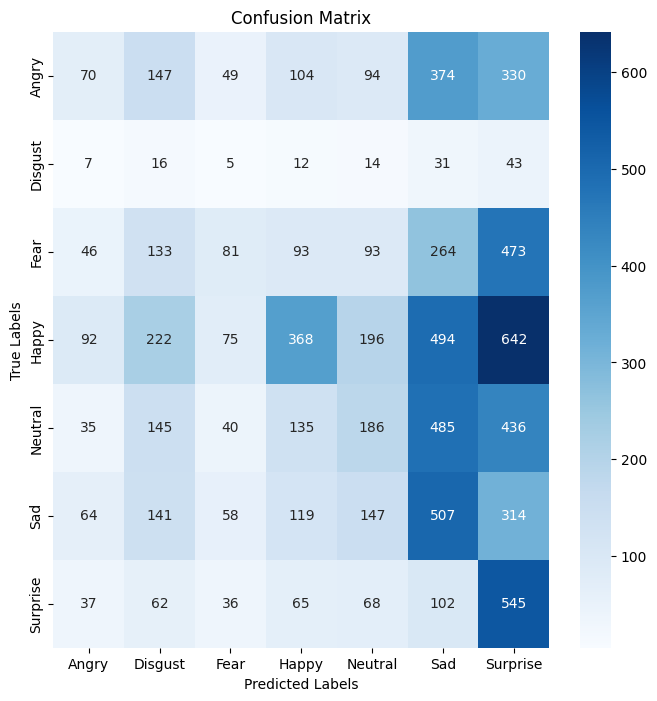

In [12]:
# Conversion of image data to 1D feature vectors (flattening)
train_images = np.array([item['matrix'] for item in train_data]).reshape(-1, 48 * 48)  # 扁平化
train_labels = np.array([label_generate(item['label']) for item in train_data])
test_images = np.array([item['matrix'] for item in test_data]).reshape(-1, 48 * 48)  # 扁平化
test_labels = np.array([label_generate(item['label']) for item in test_data])

# Splitting the training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating Simple Bayesian Model
nb_model = GaussianNB()

# train
nb_model.fit(X_train, y_train)

# predict
y_pred = nb_model.predict(X_test)

# Calculation accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate reports
report = classification_report(y_test, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])
print()
print(report)

# Visual Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()